# Value fn RMSE, random chain
Today: Nov 29, 2020

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import files

In [2]:
in_paths_dict = {
    'rwalk_sf_return': '/Users/anthony/Playground/tensorboard_logs/sr_return/1128_exp_1-3/1128-ex1_rwalk_sfret_skip10.csv',
    'rwalk_td_lambda': '/Users/anthony/Playground/tensorboard_logs/sr_return/1120_ex_1-4/exp2_rwalk_tdlamb_skip50.csv',
}

In [3]:
pd_df_sep = '\|\|'
df_dict = {}

for k in in_paths_dict:
    cur_path = in_paths_dict[k]
    df_dict[k] = pd.read_csv(cur_path, sep=pd_df_sep)
    print(f'{len(df_dict[k])}\t{k}\t{cur_path}')


/Users/anthony/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


336600	rwalk_sf_return	/Users/anthony/Playground/tensorboard_logs/sr_return/1128_exp_1-3/1128-ex1_rwalk_sfret_skip10.csv
381810	rwalk_td_lambda	/Users/anthony/Playground/tensorboard_logs/sr_return/1120_ex_1-4/exp2_rwalk_tdlamb_skip50.csv


In [4]:
df_dict['rwalk_sf_return'][0:3]

,"2020-11-29 04:20:42,935",num_episodes,envCls_name,agentCls_name,seed,gamma,lr,lamb,use_true_R_fn,episode_idx,total_steps,cumulative_reward,v_fn_rmse,sf_G_rmse,value_loss_avg,reward_loss_avg,sf_loss_avg
0,"2020-11-29 04:20:42,993",400,RandomWalkChainEnv,SFReturnAgent,2,1.0,0.001,0.0,False,0,160,1.0,0.584445,0.584522,0.006250,0.000329,0.993481
1,"2020-11-29 04:20:43,000",400,RandomWalkChainEnv,SFReturnAgent,2,1.0,0.001,0.0,False,1,28,0.0,0.584445,0.584522,0.000000,0.000000,0.993854
2,"2020-11-29 04:20:43,013",400,RandomWalkChainEnv,SFReturnAgent,2,1.0,0.001,0.0,False,2,68,1.0,0.584368,0.584522,0.014677,0.000772,0.982621


## Plot value fn RMSE
(At fixed number of learning steps)

### Parameter sweep script

In [33]:
def script_plot_value_fn_rmse_episode(n_episode_idx):
    cur_plot_x = 'lr'
    cur_plot_hue = 'lamb'
    cur_plot_ci = None #'sd', None
    

    # pick dfs
    #cur_df_key_list = ['rwalk_td_lambda', 'rwalk_sf_return', 'rwalk_sf_return']
    cur_df_key_list = ['rwalk_td_lambda', 'rwalk_sf_return']
    #cur_plot_y_list = ['v_fn_rmse', 'v_fn_rmse', 'sf_G_rmse']
    cur_plot_y_list = ['v_fn_rmse', 'sf_G_rmse']

    plt.figure(figsize=(12, 3.2))


    # Generate palette assume all the same?
    n_hues = len(set(df_dict[cur_df_key_list[0]][cur_plot_hue].values))
    c_palette = sns.color_palette("husl", n_hues)

    #
    for i in range(len(cur_df_key_list)):
        cur_df_k = cur_df_key_list[i]
        cur_plot_y = cur_plot_y_list[i]
        print(cur_df_k)

        # Filter for df
        cur_df = df_dict[cur_df_k].copy(deep=True)
        cur_df = cur_df[cur_df['episode_idx'] == n_episode_idx] 
        cur_df['lamb'] = [round(e, 3) for e in cur_df['lamb']]  # float rounding
        
        # TODO delete?
        

        # 
        plt.subplot(1, len(cur_df_key_list), (i+1))
        sns.lineplot(x=cur_plot_x, y=cur_plot_y, 
                     hue=cur_plot_hue, 
                     ci=cur_plot_ci, 
                     palette = c_palette,
                     data=cur_df)

        # plt.ylim([2e-1, 6e-1])
        plt.ylim([2e-1, 1e0])
        plt.ylabel(cur_plot_y)
        plt.xlabel('Step size')
        plt.yscale('log')
        # plt.xscale('log')
        plt.title(f'Algo: {cur_df_k}, y:{cur_plot_y}, Epis:{n_episode_idx+1}')
        
        if i < (len(cur_df_key_list)-1):
            plt.legend([])  # assume same hues for legends
        else:
            plt.legend(bbox_to_anchor=(1, 1.05), loc='upper left')
        


    plt.show()

In [34]:
# Just to see epis idx available
print(sorted(list(set(df_dict['rwalk_td_lambda']['episode_idx'].values)))[0:5])
print(sorted(list(set(df_dict['rwalk_sf_return']['episode_idx'].values)))[:])


[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 59, 69, 79, 89, 99, 109, 119, 129, 139, 149, 159, 169, 179, 189, 199, 209, 219, 229, 239, 249, 259, 269, 279, 289, 299, 309, 319, 329, 339, 349, 359, 369, 379, 389, 399]


rwalk_td_lambda
rwalk_sf_return


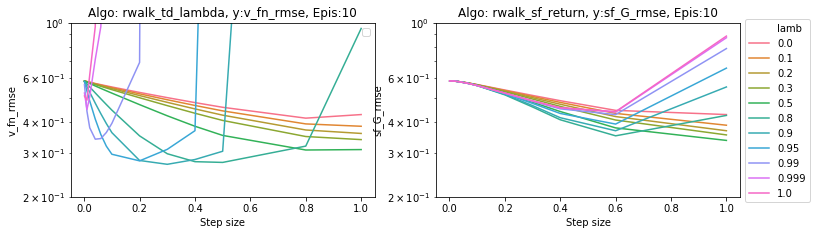

In [35]:
cur_eval_epis_idx = 10-1
script_plot_value_fn_rmse_episode(cur_eval_epis_idx)

rwalk_td_lambda
rwalk_sf_return


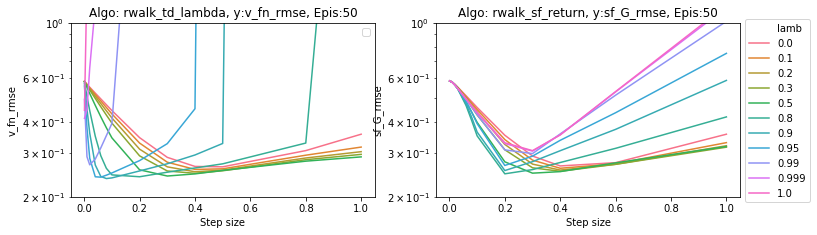

In [36]:
cur_eval_epis_idx = 50-1
script_plot_value_fn_rmse_episode(cur_eval_epis_idx)

rwalk_td_lambda
rwalk_sf_return


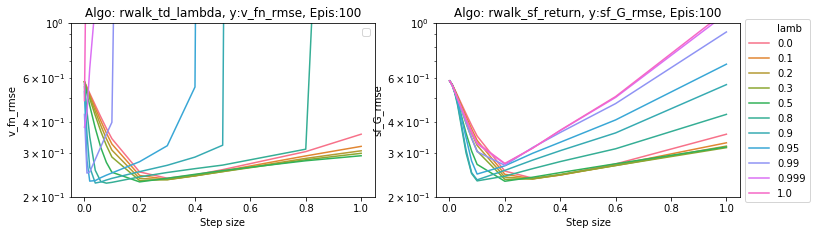

In [37]:
cur_eval_epis_idx = 100-1
script_plot_value_fn_rmse_episode(cur_eval_epis_idx)

### Learning process script

In [38]:
cur_df_key_list = ['rwalk_td_lambda', 'rwalk_sf_return']
for cur_df_k in cur_df_key_list:
    print(cur_df_k, sorted(set(df_dict[cur_df_k]['lr'])) )

rwalk_td_lambda [0.001, 0.01, 0.02, 0.04, 0.06, 0.08, 0.1, 0.2, 0.3, 0.4, 0.5, 0.8, 1.0]
rwalk_sf_return [0.001, 0.01, 0.02, 0.03, 0.06, 0.08, 0.1, 0.2, 0.3, 0.4, 0.6, 1.0]


rwalk_td_lambda
rwalk_sf_return


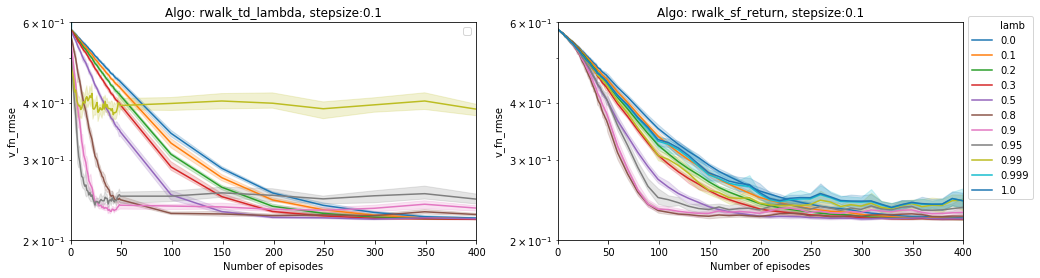

In [40]:
def script_plot_value_learning_per_episode():
    cur_plot_x = 'episode_idx'
    cur_plot_hue = 'lamb'
    cur_plot_ci = 95  # 'sd'
    cur_plot_n_boot = 20

    # pick dfs
    #cur_df_key_list = ['rwalk_td_lambda', 'rwalk_sf_return', 'rwalk_sf_return']
    #cur_plot_y_list = ['v_fn_rmse', 'v_fn_rmse', 'sf_G_rmse']
    #cur_lr_list = [0.1, 0.1, 0.1]
    cur_df_key_list = ['rwalk_td_lambda', 'rwalk_sf_return']
    cur_plot_y_list = ['v_fn_rmse', 'v_fn_rmse']
    cur_lr_list = [0.1, 0.1]

    plt.figure(figsize=(16, 4))
    
    # Generate palette assume all the same?
    n_hues = len(set(df_dict[cur_df_key_list[0]][cur_plot_hue].values))
    c_palette = sns.color_palette("tab10", n_hues)
    
    for i in range(len(cur_df_key_list)):
        cur_df_k = cur_df_key_list[i]
        cur_stepsize = cur_lr_list[i]
        cur_plot_y = cur_plot_y_list[i]
        print(cur_df_k)
        
        # Filter for df
        cur_df = df_dict[cur_df_k].copy(deep=True)
        cur_df = cur_df[cur_df['lr'] == cur_stepsize] 
        cur_df['lamb'] = [round(e, 3) for e in cur_df['lamb']]  # float rounding
        
        # 
        plt.subplot(1, len(cur_df_key_list), (i+1))
        sns.lineplot(x=cur_plot_x, y=cur_plot_y, 
                     hue=cur_plot_hue, 
                     ci=cur_plot_ci, 
                     n_boot=cur_plot_n_boot,
                     palette = c_palette,
                     data=cur_df)
        
        plt.ylim([2e-1, 6e-1])
        plt.xlim([0, 400])
        plt.yscale('log')
        
        plt.xlabel('Number of episodes')
        plt.ylabel(cur_plot_y)
        plt.title(f'Algo: {cur_df_k}, stepsize:{cur_stepsize}')
        
        if i < (len(cur_df_key_list)-1):
            plt.legend([])  # assume same hues for legends
        else:
            plt.legend(bbox_to_anchor=(1, 1.05), loc='upper left')
        
    plt.show()
    
script_plot_value_learning_per_episode()

#### Looking at different losses for SF

Algo: rwalk_sf_return, stepsize:0.01


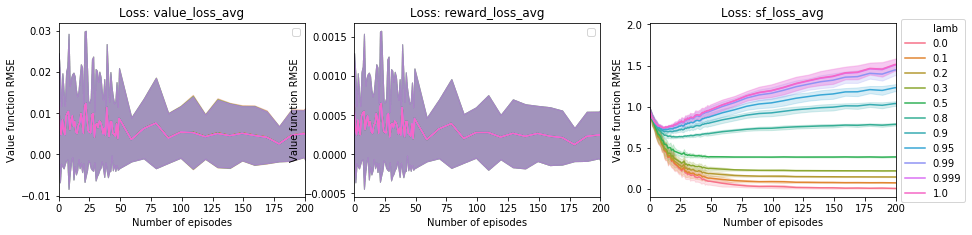

In [12]:
def script_plot_sf_losses_per_episode():
    cur_plot_x = 'episode_idx'
    cur_plot_hue = 'lamb'
    cur_plot_ci = 'sd' # 'sd'
    
    cur_plot_y_list = ['value_loss_avg','reward_loss_avg','sf_loss_avg']
    
    cur_df_key = 'rwalk_sf_return'
    cur_stepsize = 0.01
    
    print(f'Algo: {cur_df_key}, stepsize:{cur_stepsize}')
    
    
    # Filter for df
    cur_df = df_dict[cur_df_key].copy(deep=True)
    cur_df = cur_df[cur_df['lr'] == cur_stepsize]
    cur_df['lamb'] = [round(e, 3) for e in cur_df['lamb']]  # float rounding

    plt.figure(figsize=(15, 3.2))
    
    # Generate palette assume all the same?
    n_hues = len(set(df_dict[cur_df_key_list[0]][cur_plot_hue].values))
    c_palette = sns.color_palette("husl", n_hues)
    
    for i in range(len(cur_plot_y_list)):
        cur_plot_y = cur_plot_y_list[i]
        
        # 
        plt.subplot(1, len(cur_plot_y_list), (i+1))
        sns.lineplot(x=cur_plot_x, y=cur_plot_y, 
                     hue=cur_plot_hue, 
                     ci=cur_plot_ci, 
                     palette = c_palette,
                     data=cur_df)
        
        #plt.ylim([0.7, 100])
        #plt.yscale('log')
        plt.xlim([0, 200])
        
        plt.xlabel('Number of episodes')
        plt.ylabel('Value function RMSE')
        plt.title(f'Loss: {cur_plot_y}')
        
        if i < (len(cur_plot_y_list)-1):
            plt.legend([])  # assume same hues for legends
        else:
            plt.legend(bbox_to_anchor=(1, 1.05), loc='upper left')
        
    plt.show()
    
script_plot_sf_losses_per_episode()

#### Look at loss for TD(lambda)

Algo: rwalk_td_lambda, stepsize:0.01


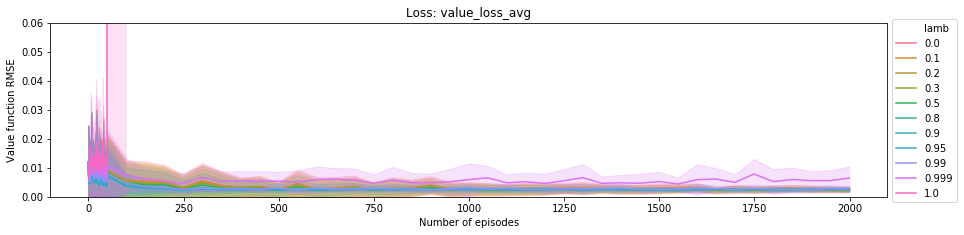

In [13]:
def script_plot_tdlamb_losses_per_episode():
    cur_plot_x = 'episode_idx'
    cur_plot_hue = 'lamb'
    cur_plot_ci = 'sd'
    
    # cur_plot_y_list = ['value_loss_avg','reward_loss_avg']
    cur_plot_y_list = ['value_loss_avg']
    
    cur_df_key = 'rwalk_td_lambda'
    cur_stepsize = 0.01
    
    print(f'Algo: {cur_df_key}, stepsize:{cur_stepsize}')
    
    
    # Filter for df
    cur_df = df_dict[cur_df_key].copy(deep=True)
    cur_df = cur_df[cur_df['lr'] == cur_stepsize]
    cur_df['lamb'] = [round(e, 3) for e in cur_df['lamb']]  # float rounding

    plt.figure(figsize=(15, 3.2))
    
    # Generate palette assume all the same?
    n_hues = len(set(df_dict[cur_df_key_list[0]][cur_plot_hue].values))
    c_palette = sns.color_palette("husl", n_hues)
    
    for i in range(len(cur_plot_y_list)):
        cur_plot_y = cur_plot_y_list[i]
        
        # 
        plt.subplot(1, len(cur_plot_y_list), (i+1))
        sns.lineplot(x=cur_plot_x, y=cur_plot_y, 
                     hue=cur_plot_hue, 
                     ci=cur_plot_ci, 
                     palette = c_palette,
                     data=cur_df)
        
        #plt.ylim([0.7, 100])
        plt.ylim([0.0, 0.06])
        #plt.yscale('log')
        
        
        plt.xlabel('Number of episodes')
        plt.ylabel('Value function RMSE')
        plt.title(f'Loss: {cur_plot_y}')
        
        if i < (len(cur_plot_y_list)-1):
            plt.legend([])  # assume same hues for legends
        else:
            plt.legend(bbox_to_anchor=(1, 1.05), loc='upper left')
        
    plt.show()
    
script_plot_tdlamb_losses_per_episode()